# Simple Autoencoder for Image Compression and Denoising
- [Introduction](#intro)
- [Part 1: Autoencoder Building](#part1)
- [Part 2: Autoencoder for Image Compression](#part2)
- [Part 3: Autoencoder for Image Denoising](#part3)

<a id='intro'></a>
## Introduction

In this project, I will use Tensorflow to build a simple autoencoder with one hidden fully-connected layer, and will show how this neural network can be applied to images from the MNIST dataset to compress and denoise them.

This notebook consists of 3 parts. In Part 1, I will build the neural network. In Parts 2 and 3, I'll show results for image compression and denoising, respectively.

<a id='part1'></a>
## Part 1: Autoencoder Building

In [39]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

Let's first download the MNIST dataset from the Tensorflow tutorial and have a look at a sample image. The images are already flattened to a 784 pixels vector, and normalized between 0 and 1.

In [2]:
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


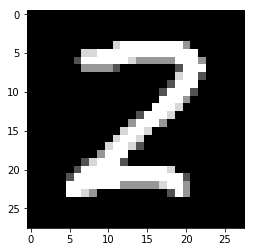

In [38]:
%matplotlib inline
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

Let's build the autoencoder. It will consist of the input layer (size=784), a short hidden layer (here I chose a size of 32) and the output layer (same size as the input, i.e. 784). 

In [26]:
# Size of the encoding layer
encoding_dim = 32

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, [None, 784], name='inputs')
targets_ = tf.placeholder(tf.float32, [None, 784], name='targets')

# Output of hidden layer
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits
logits = tf.layers.dense(encoded, 784)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

<a id='part2'></a>
## Part 2: Autoencoder Training for Image Compression

To train the autoencoder for image compression, we simply need to use the input images as targets:

In [40]:
sess = tf.Session()

epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        # inputs = targets
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

    print("Epoch: {}/{}...".format(e+1, epochs),
            "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.1901
Epoch: 2/20... Training loss: 0.1408
Epoch: 3/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1094
Epoch: 6/20... Training loss: 0.1058
Epoch: 7/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0904
Epoch: 13/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0894
Epoch: 17/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0935


Let's have a look at the input images and how they look like after passing through the compressed hidden layer:

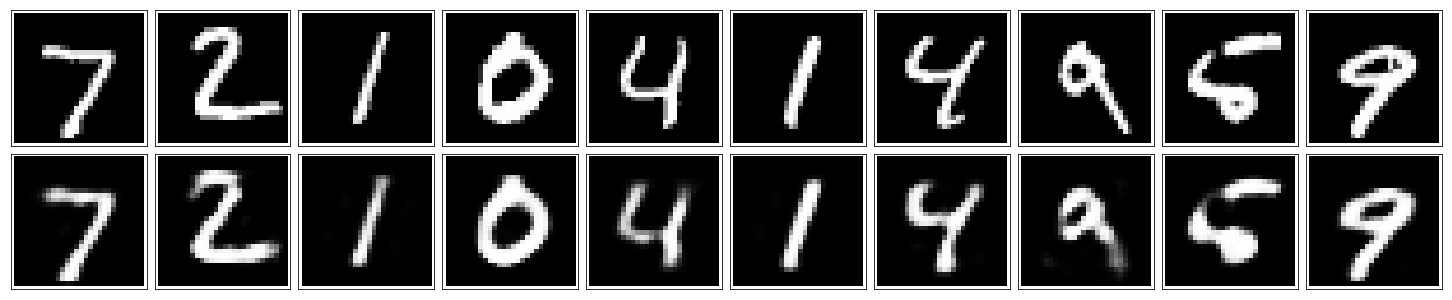

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [41]:
sess.close()

<a id='part3'></a>
## Part 3: Autoencoder Training for Image Denoising

To teach the network to denoise images, we keep the same network architecture, and simply add some random noise to the input images and keep the original images as targets:

In [42]:
sess = tf.Session()
epochs = 20
batch_size = 200
# Set amount of noise added to the images:
noise_factor = 0.5
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        # Get images from the batch
        imgs = batch[0]
        
        # Add random noise to the input images
        noisy_imgs = imgs + noise_factor * np.random.randn(*imgs.shape)
        # Clip the images to be between 0 and 1
        noisy_imgs = np.clip(noisy_imgs, 0., 1.)
        
        # Noisy images as inputs, original images as targets
        batch_cost, _ = sess.run([cost, opt], feed_dict={inputs_: noisy_imgs,
                                                         targets_: imgs})

    print("Epoch: {}/{}...".format(e+1, epochs),
            "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.2086
Epoch: 2/20... Training loss: 0.1685
Epoch: 3/20... Training loss: 0.1655
Epoch: 4/20... Training loss: 0.1469
Epoch: 5/20... Training loss: 0.1413
Epoch: 6/20... Training loss: 0.1369
Epoch: 7/20... Training loss: 0.1375
Epoch: 8/20... Training loss: 0.1353
Epoch: 9/20... Training loss: 0.1271
Epoch: 10/20... Training loss: 0.1314
Epoch: 11/20... Training loss: 0.1286
Epoch: 12/20... Training loss: 0.1321
Epoch: 13/20... Training loss: 0.1289
Epoch: 14/20... Training loss: 0.1341
Epoch: 15/20... Training loss: 0.1335
Epoch: 16/20... Training loss: 0.1315
Epoch: 17/20... Training loss: 0.1321
Epoch: 18/20... Training loss: 0.1305
Epoch: 19/20... Training loss: 0.1353
Epoch: 20/20... Training loss: 0.1304


Let's see the output of the network when we input noisy images:

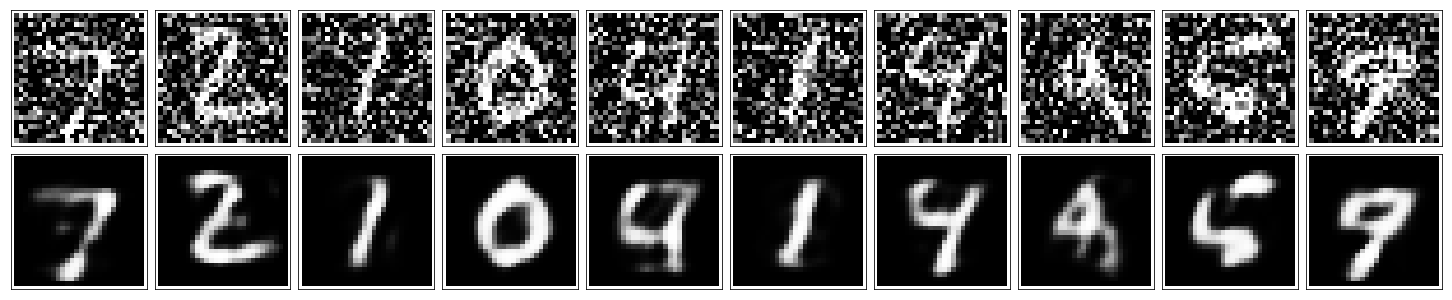

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
noisy_imgs = in_imgs + noise_factor * np.random.randn(*in_imgs.shape)
noisy_imgs = np.clip(noisy_imgs, 0., 1.)

reconstructed = sess.run(decoded, feed_dict={inputs_: noisy_imgs})

for images, row in zip([noisy_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [44]:
sess.close()